In [2]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input,train_target),(test_input,test_target) = load_data()

In [5]:
train_scaled = train_input.reshape(-1,28,28,1) /255.0

In [6]:
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
def show_images(dataset,label,nrow,ncol):

    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols= ncol, figsize=(2*ncol,2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):

        image = dataset[i]
        ax[i].imshow(image,cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()

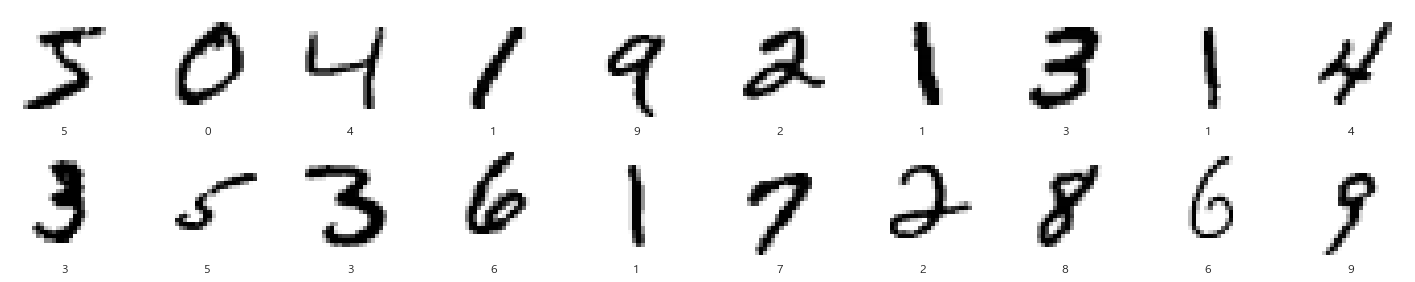

In [8]:
show_images(train_input,train_target,2,10)

In [9]:
model = keras.Sequential(name='CNN')

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten()) # 2차원 입력 값을 1차원으로
model.add(keras.layers.Dense(100,activation='relu',name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 100)               313700  

In [10]:
# 255.0 나눠서 0~1로 값 축소하는 일은 안함
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_CNN_model_MNIST.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20,verbose=1,batch_size=100, validation_data=(test_input, test_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 0.7542 - accuracy: 0.8344
Epoch 1: val_loss improved from inf to 0.07814, saving model to ./data\best_CNN_model_MNIST.h5
600/600 [==============================] - 30s 49ms/step - loss: 0.7542 - accuracy: 0.8344 - val_loss: 0.0781 - val_accuracy: 0.9778
Epoch 2/20
600/600 [==============================] - ETA: 0s - loss: 0.1330 - accuracy: 0.9607
Epoch 2: val_loss improved from 0.07814 to 0.05442, saving model to ./data\best_CNN_model_MNIST.h5
600/600 [==============================] - 30s 51ms/step - loss: 0.1330 - accuracy: 0.9607 - val_loss: 0.0544 - val_accuracy: 0.9843
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.9731
Epoch 3: val_loss improved from 0.05442 to 0.04071, saving model to ./data\best_CNN_model_MNIST.h5
600/600 [==============================] - 32s 53ms/step - loss: 0.0920 - accuracy: 0.9731 - val_loss: 0.0407 - val_accuracy: 0.9876
Epoch 4/20
600/600 [

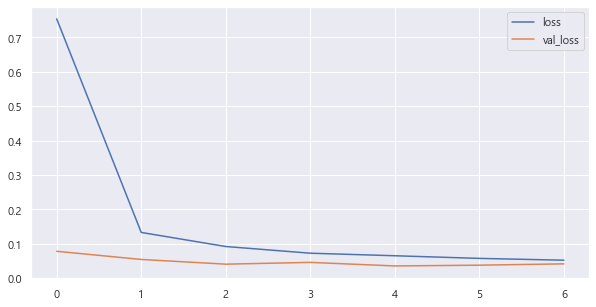

In [11]:
plot_target = ['loss','val_loss']
plt.figure(figsize=(10,5))


for each in plot_target:
    plt.plot(history.history[each],label=each)
plt.legend()
plt.show()

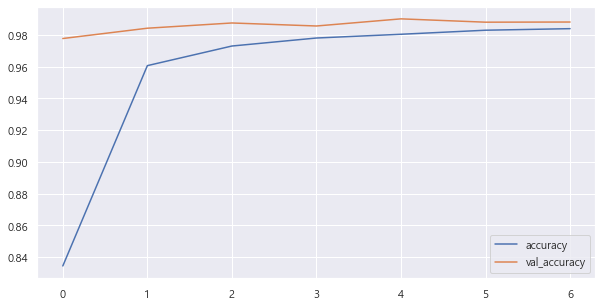

In [12]:
plot_target = ['accuracy','val_accuracy']
plt.figure(figsize=(10,5))


for each in plot_target:
    plt.plot(history.history[each],label=each)
plt.legend()
plt.show()

In [13]:
model.evaluate(test_input,test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.0355 - accuracy: 0.9902


[0.03552694618701935, 0.9901999831199646]

In [14]:
pred_result = model.predict(test_input)

313/313 [==============================] - 2s 5ms/step


In [15]:
pred_labels = np.argmax(pred_result,axis=-1)
pred_labels[:10]
pred_labels.shape

(10000,)

##### 예측실패한 이미지 파악

In [16]:
worng_result = []

for i in range(0,len(test_target)):
    if pred_labels[i] != test_target[i]:
        worng_result.append(i)

len(worng_result)

98

In [17]:
import random

sample = random.choices(population=worng_result,k=16)
sample

[684,
 3288,
 9015,
 3662,
 3288,
 2422,
 1112,
 9729,
 2995,
 2939,
 4731,
 1878,
 4507,
 1319,
 4507,
 7121]

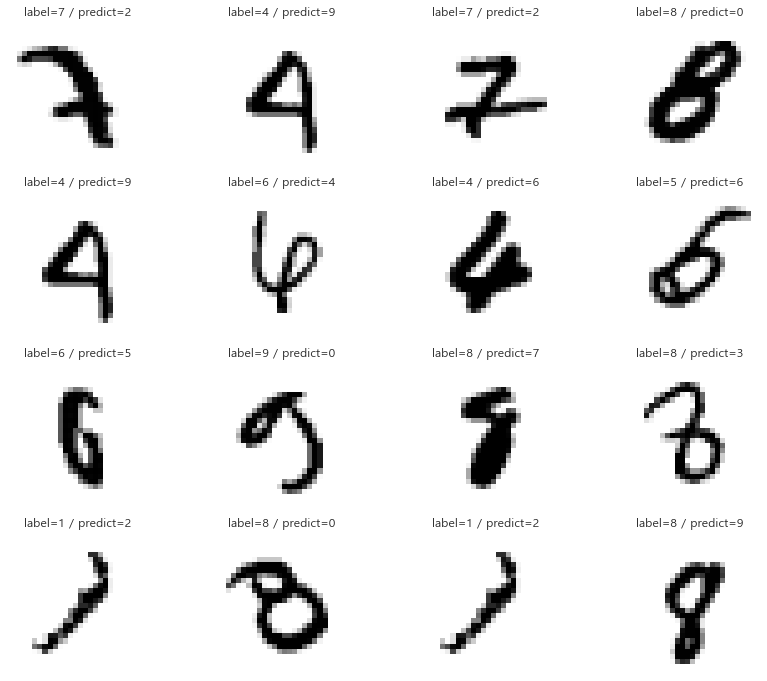

In [18]:
# 예측실패한 이미지 확인

plt.figure(figsize=(14,12))
for idx,n in enumerate(sample):
    plt.subplot(4,4,idx+1)
    plt.imshow(test_input[n].reshape(28,28),cmap='gray_r',interpolation='nearest')
    plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
    plt.axis('off')

plt.show()